### 1. What is Gradient Descent?

- Suppose you are at the top of a mountain, and you have to reach a lake which is at the lowest point of the mountain. A twist is that you are blindfolded and you have zero visibility to see where you are headed. So, what approach will you take to reach the lake?
- The best way is to check the ground near you and observe where the land tends to descend. This will give an idea in what direction you should take your first step. If you follow the descending path, it is very likely you would reach the lake.

<img src='1.png' width=400>

- Gradient Descent is an optimization algorithm that helps machine learning models converge at a minimum value through repeated steps. Essentially, gradient descent is used to minimize a function by finding the value that gives the lowest output of that function

- Often times, this function is usually a loss function. Loss functions measure how bad our model performs compared to actual occurrences. Hence, it only makes sense that we should reduce this loss. One way to do this is via Gradient Descent.

## A simple gradient Descent Algorithm is as follows:
 - Obtain a function to minimize F(x)
 - Initialize a value x from which to start the descent or optimization from
 - Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value
 - Obtain the derivative of that value x (the descent)
 - Proceed to descend by the derivative of that value multiplied by the learning rate
 - Update the value of x with the new value descended to
 - Check your stop condition to see whether to stop
 - If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

## Implementing the Model

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [70]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [71]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

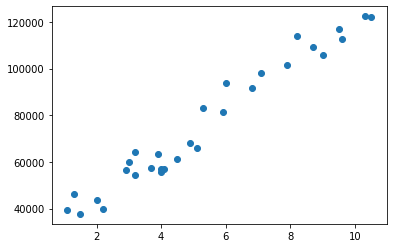

In [73]:
plt.scatter(X, y)
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [75]:
m1 = regressor.coef_[0]
c1 = regressor.intercept_
print(m1,c1)

9449.962321455074 25792.20019866871


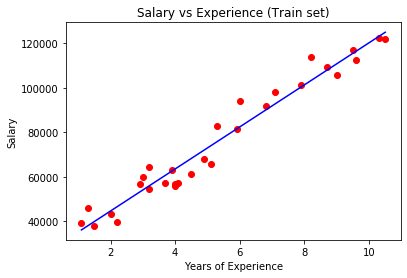

In [76]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Mean Squared Error.

In [77]:
from sklearn.metrics import  r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [78]:
y_test_pred_lr =  regressor.predict(X)
print("RMSE :" , np.sqrt(mean_squared_error(y,y_test_pred_lr)))

RMSE : 5592.043608760662


In [80]:
X =  dataset.iloc[:, 0]
Y =  dataset.iloc[:, 1]

In [82]:
# Building the model
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 2000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y- Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

10969.247352636694 15554.141616378734


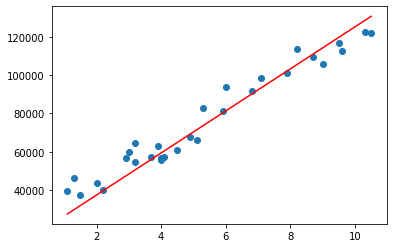

In [83]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [84]:
print("RMSE :" , np.sqrt(mean_squared_error(Y,Y_pred)))

RMSE : 7343.748461237712
